<a href="https://colab.research.google.com/github/IBREEZZ/Code_Academy_Makeen2/blob/main/Correlation(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv("/content/student_habits_performance.csv")
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [3]:
correlation = df['study_hours_per_day'].corr(df['exam_score'])
correlation

np.float64(0.825418509396044)

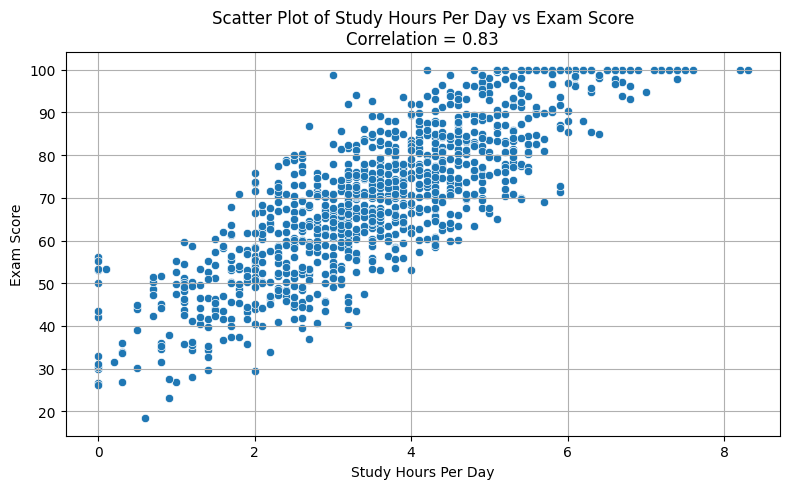

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title(f'Scatter Plot of Study Hours Per Day vs Exam Score\nCorrelation = {correlation:.2f}')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Exam Score')
plt.grid(True)
plt.tight_layout()
plt.show()

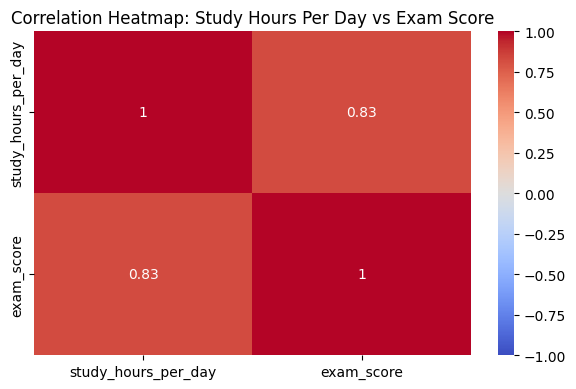

In [7]:
plt.figure(figsize=(6, 4))
corr_matrix = df[['study_hours_per_day', 'exam_score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Study Hours Per Day vs Exam Score')
plt.tight_layout()
plt.show()


- strong positive correlation
- The closer the value is to 1, the stronger the relationship

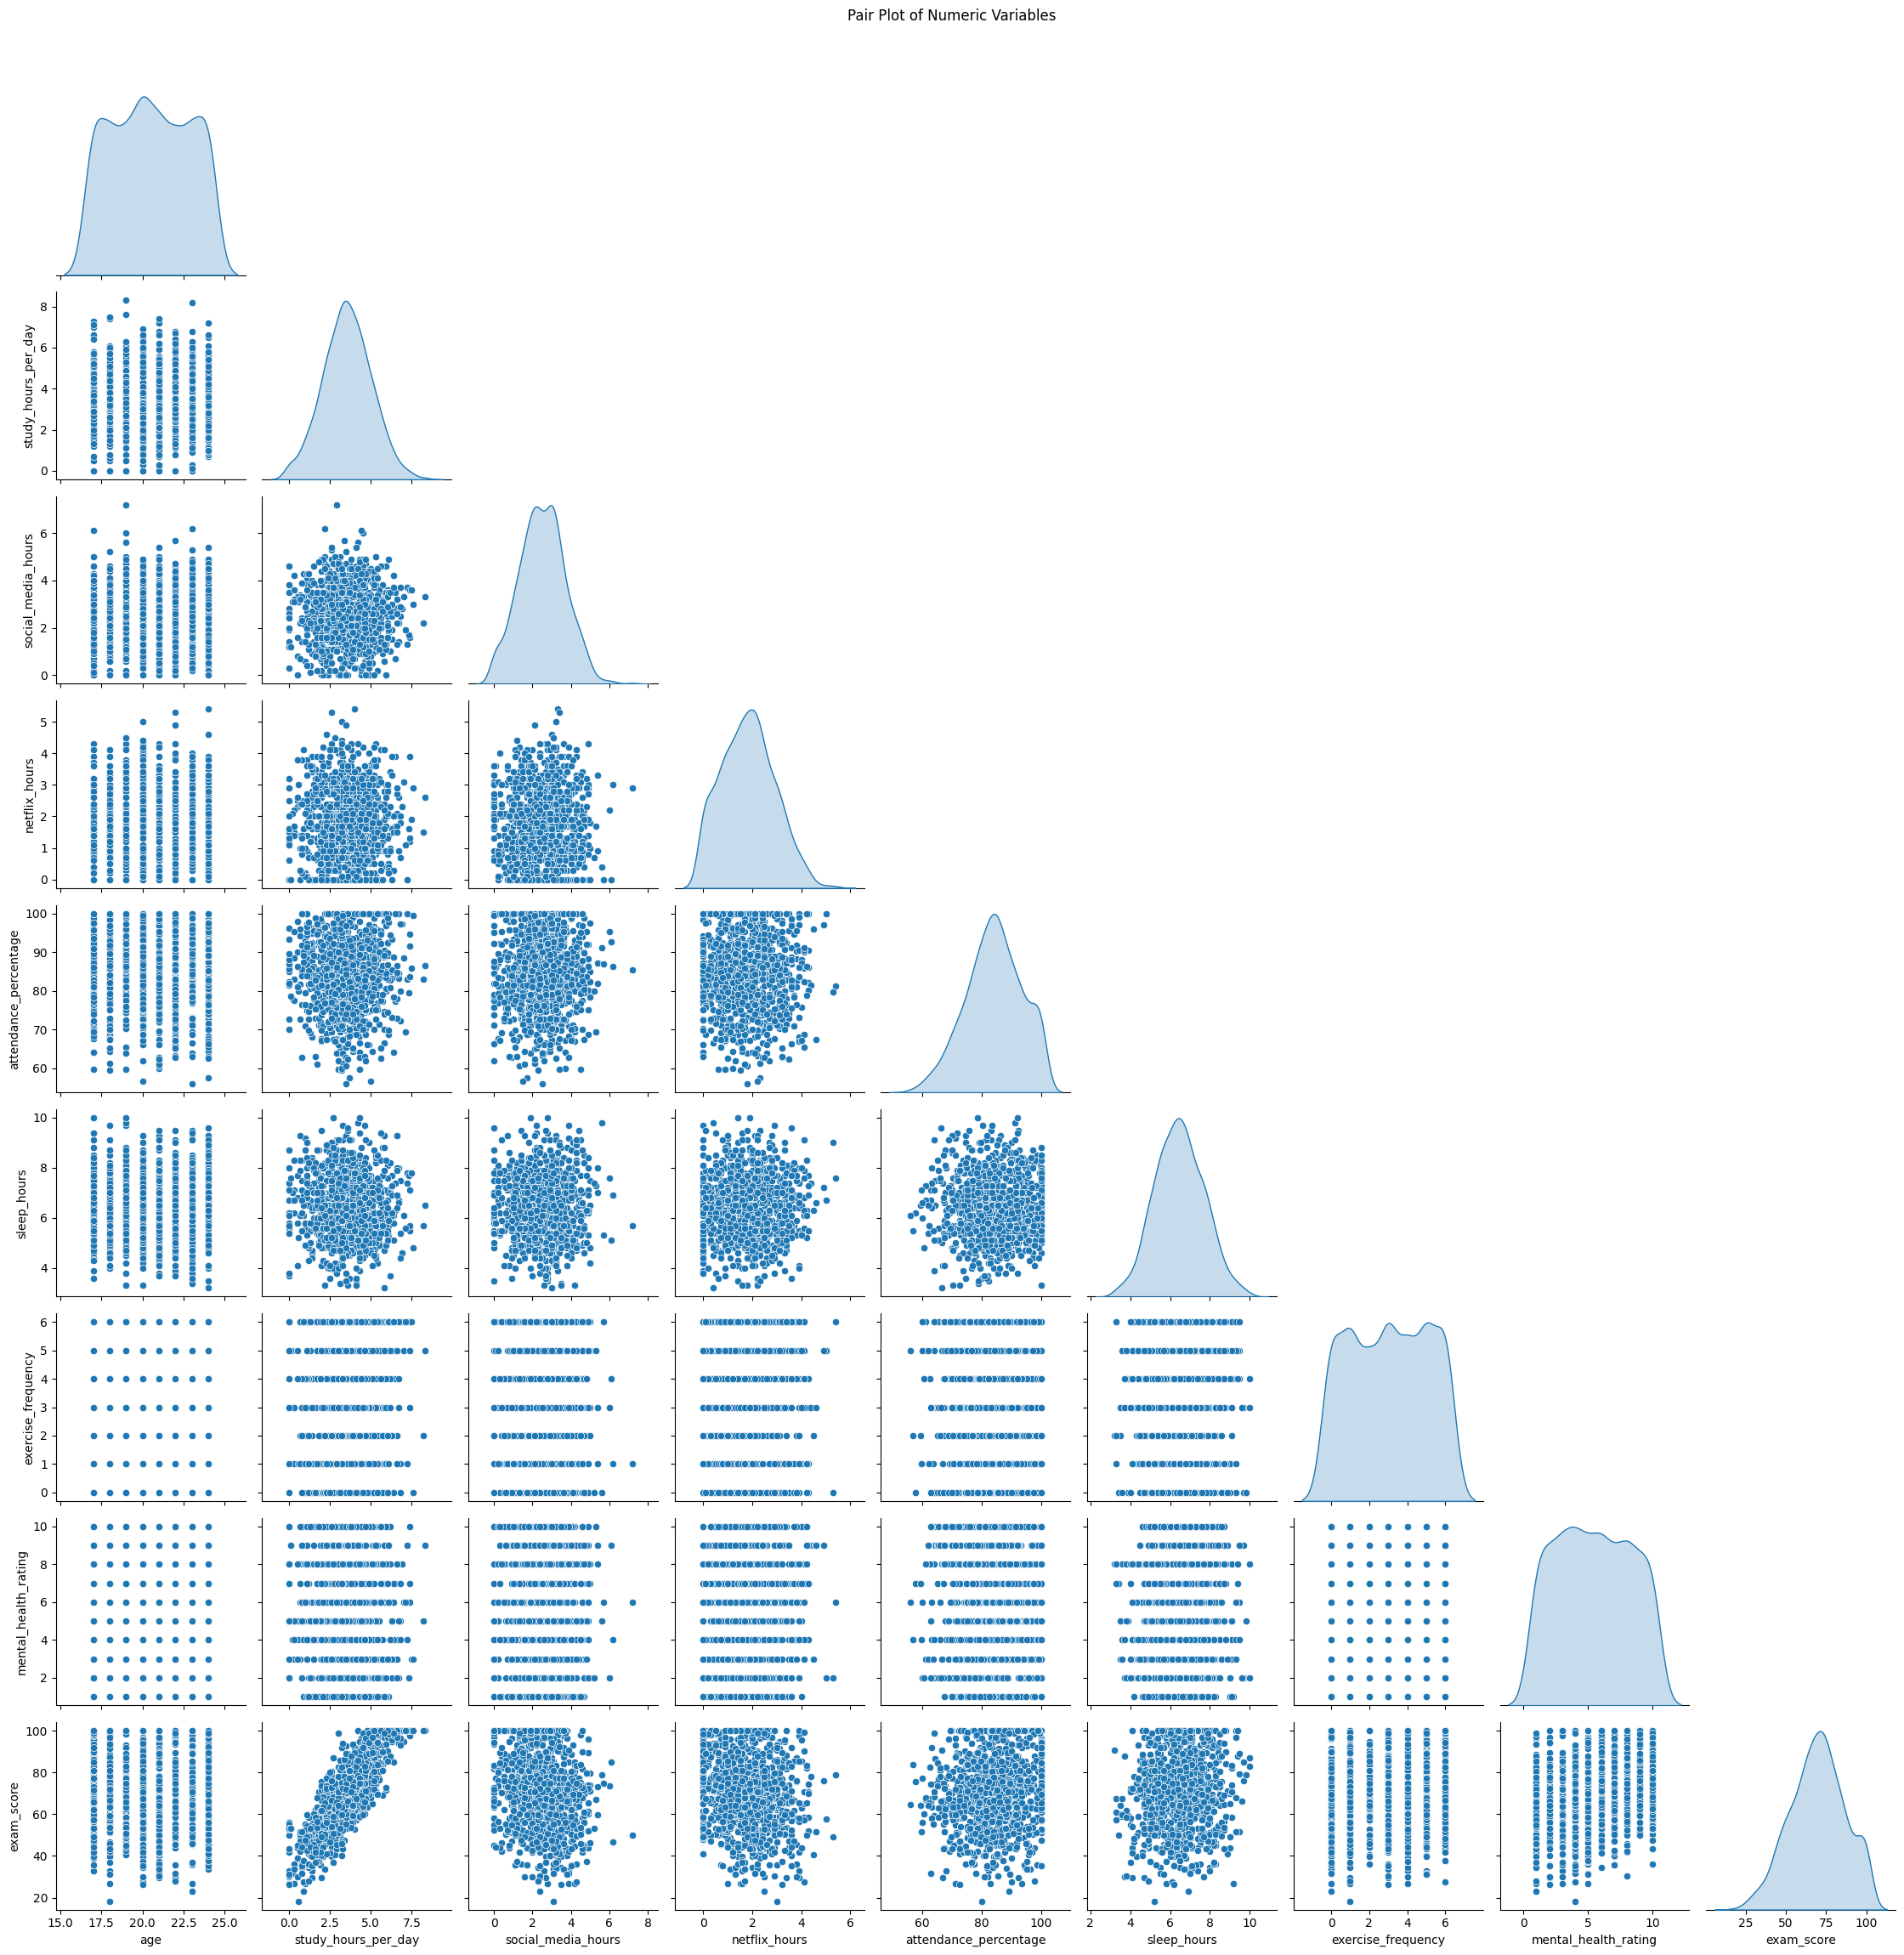

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for the pair plot
numeric_columns = df.select_dtypes(include='number')

# Create the pair plot
sns.pairplot(numeric_columns, corner=True, diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.tight_layout()
plt.show()


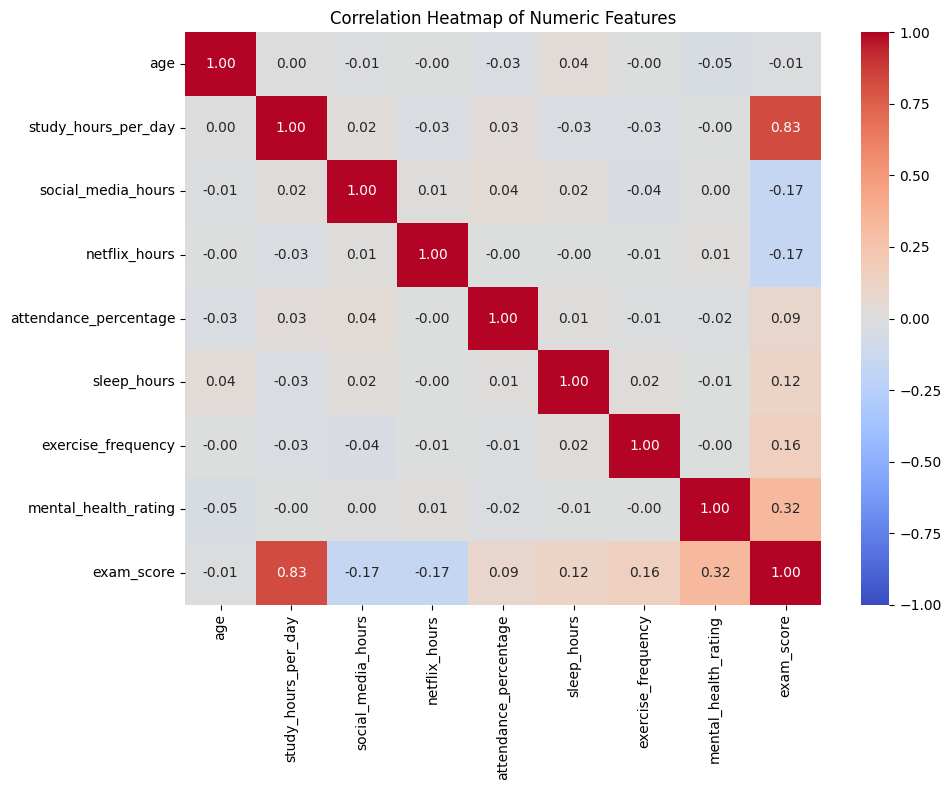

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')


plt.figure(figsize=(10, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


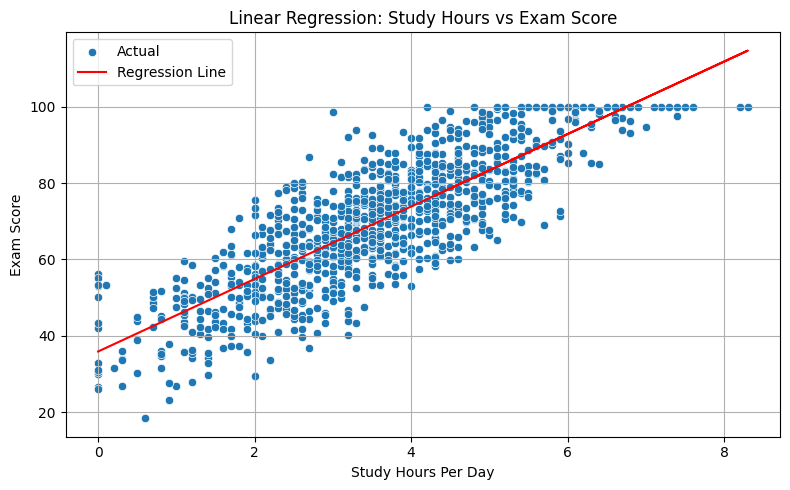

Intercept: 35.91
Slope: 9.49


In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape the data for scikit-learn
X = df[['study_hours_per_day']]  # independent variable # its well start with 0
y = df['exam_score']             # dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values
df['predicted_score'] = model.predict(X)

# Plot regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, label='Actual')
plt.plot(df['study_hours_per_day'], df['predicted_score'], color='red', label='Regression Line')
plt.title('Linear Regression: Study Hours vs Exam Score')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print model details
print(f"Intercept: {model.intercept_:.2f}") # if they study 0 hours
print(f"Slope: {model.coef_[0]:.2f}") # how much the score increase if they stud 1 hours more


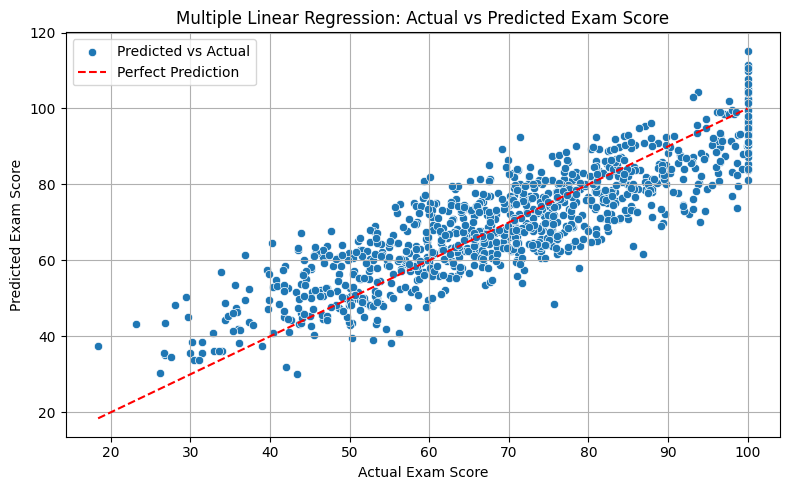

Intercept: 46.62
Coefficient for study_hours_per_day: 9.48
Coefficient for social_media_hours: -2.62
Coefficient for netflix_hours: -2.26


In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Multiple independent variables
X = df[['study_hours_per_day', 'social_media_hours', 'netflix_hours']]  # 3 predictors
y = df['exam_score']  # dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values
df['predicted_score'] = model.predict(X)

# Since this is a multiple regression, we cannot plot all predictors in 2D easily
# But you can still plot actual vs predicted scores
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['exam_score'], y=df['predicted_score'], label='Predicted vs Actual')
plt.plot([df['exam_score'].min(), df['exam_score'].max()],
         [df['exam_score'].min(), df['exam_score'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('Multiple Linear Regression: Actual vs Predicted Exam Score')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print model details
print(f"Intercept: {model.intercept_:.2f}")
for feature, coef in zip(X.columns, model.coef_):
    print(f"Coefficient for {feature}: {coef:.2f}")
